#Libraries Import

In [1]:
#Tools for data handling
from google.colab import files
import pandas as pd
import numpy as np
import tqdm

#Tools for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

#Tools for model evaluations
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Tools for visualizations
import seaborn as sns
import matplotlib.pyplot as plt


#Elementary Data Analysis (EDA)


##Data loading

In [2]:
#Uncomment below line and choose the file 'spambase.data' if using google colab
files.upload()

#Read the dataset file
df = pd.read_csv('spambase.data', header=None)

#Have a look at the dataset
df.head()

Saving spambase.data to spambase.data


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


##Features Correlation

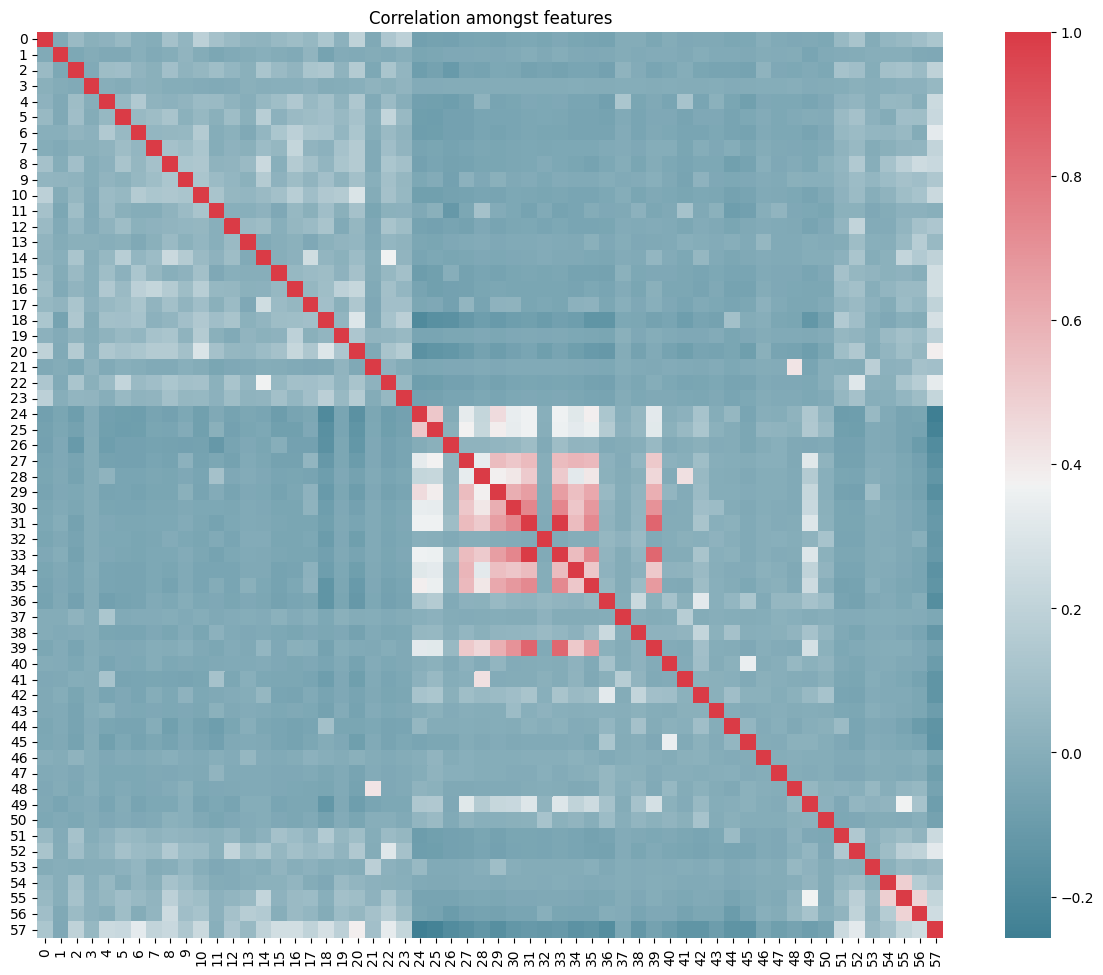

In [3]:
#Calculate correlations using pandas
fet_corr=df.corr()
#Empty figure
plt.figure(figsize=(16, 12), dpi = 100)
#Plot correlation matrix using heatmap
ax=sns.heatmap(fet_corr,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)
plt.title("Correlation amongst features");

##Class Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distribution')

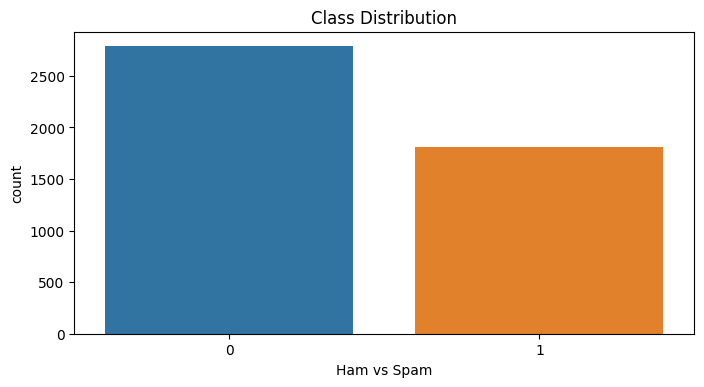

In [4]:
#Class Labels
Labels = ['Ham', 'Spam']

#Empty figure
plt.figure(figsize=(8,4),dpi=100)

#Class wise distribution
sns.countplot(df[57]);

plt.xlabel('Ham vs Spam');
plt.title('Class Distribution')

#Data Preprocessing

In [5]:
#Separate label from the features
Y = df.pop(57)

#Normalize the features
X = StandardScaler().fit_transform(df)

#Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.1, random_state=42)

#Traditional Machine Learning Algorithms

##Logistic Regression

In [6]:
#Import the model from scikit learn
from sklearn.linear_model import LogisticRegression

#Creating the model
lr_model = LogisticRegression(penalty="l2", max_iter=100)

#Model training
lr_model.fit(X_train, y_train)

#Model predictions
lr_pred = lr_model.predict(X_test)

In [7]:
#Print the classification report of the model
print(classification_report(y_test, lr_pred, target_names=[l for l in Labels]))

              precision    recall  f1-score   support

         Ham       0.91      0.97      0.94       266
        Spam       0.96      0.86      0.91       195

    accuracy                           0.93       461
   macro avg       0.93      0.92      0.92       461
weighted avg       0.93      0.93      0.93       461



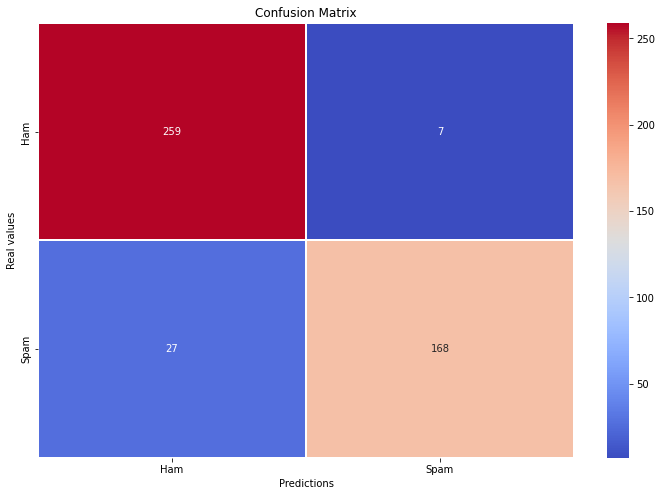

In [8]:
#Calculate the confusion matrix
lr_matrix = confusion_matrix(y_test, lr_pred)

#Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(lr_matrix,
            cmap='coolwarm',
            linecolor='white',
            linewidths=1,
            xticklabels=Labels,
            yticklabels=Labels,
            annot=True,
            fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Real values')
plt.xlabel('Predictions')
plt.show()

##Support Vector Machine (SVM)

In [9]:
#Import the model from scikit learn
from sklearn.svm import SVC

#Creating the model
svm_model = SVC(kernel="rbf")

#Model training
svm_model.fit(X_train, y_train)

#Model predictions
svm_pred = svm_model.predict(X_test)

In [10]:
#Print the classification report of the model
print(classification_report(y_test, svm_pred, target_names=[l for l in Labels]))

              precision    recall  f1-score   support

         Ham       0.92      0.97      0.94       266
        Spam       0.96      0.88      0.92       195

    accuracy                           0.93       461
   macro avg       0.94      0.93      0.93       461
weighted avg       0.93      0.93      0.93       461



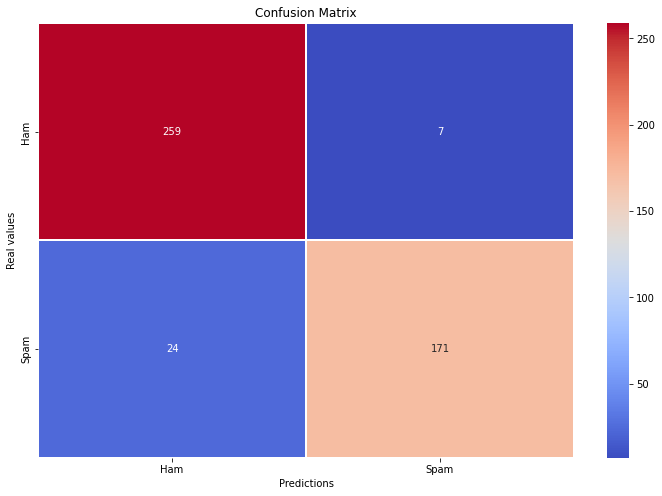

In [11]:
#Calculate the confusion matrix
svm_matrix = confusion_matrix(y_test, svm_pred)

#Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(svm_matrix,
            cmap='coolwarm',
            linecolor='white',
            linewidths=1,
            xticklabels=Labels,
            yticklabels=Labels,
            annot=True,
            fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Real values')
plt.xlabel('Predictions')
plt.show()

##Naive Bayes

In [12]:
#Import the model from scikit learn
from sklearn.naive_bayes import MultinomialNB

#Creating the model
nb_model = Pipeline([('Normalizing',MinMaxScaler()),('MultinomialNB',MultinomialNB())])

#Model training
nb_model.fit(X_train,y_train)

#Model predictions
nb_pred = nb_model.predict(X_test)

In [13]:
#Print the classification report of the model
print(classification_report(y_test, nb_pred, target_names=[l for l in Labels]))

              precision    recall  f1-score   support

         Ham       0.84      0.97      0.90       266
        Spam       0.95      0.75      0.84       195

    accuracy                           0.88       461
   macro avg       0.89      0.86      0.87       461
weighted avg       0.89      0.88      0.87       461



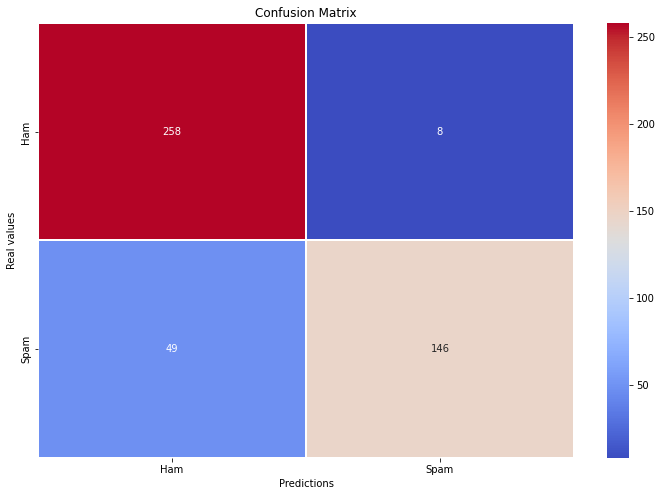

In [14]:
#Calculate the confusion matrix
nb_matrix = confusion_matrix(y_test, nb_pred)

#Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(nb_matrix,
            cmap='coolwarm',
            linecolor='white',
            linewidths=1,
            xticklabels=Labels,
            yticklabels=Labels,
            annot=True,
            fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Real values')
plt.xlabel('Predictions')
plt.show()

##Decision Tree Classifier

In [15]:
#Import the model from scikit learn
from sklearn.tree import DecisionTreeClassifier

#Creating the model
dt_model = DecisionTreeClassifier(criterion="gini")

#Model training
dt_model.fit(X_train,y_train)

#Model predictions
dt_pred = dt_model.predict(X_test)

In [16]:
#Print the classification report of the model
print(classification_report(y_test, dt_pred, target_names=[l for l in Labels]))

              precision    recall  f1-score   support

         Ham       0.91      0.97      0.94       266
        Spam       0.95      0.87      0.91       195

    accuracy                           0.92       461
   macro avg       0.93      0.92      0.92       461
weighted avg       0.93      0.92      0.92       461



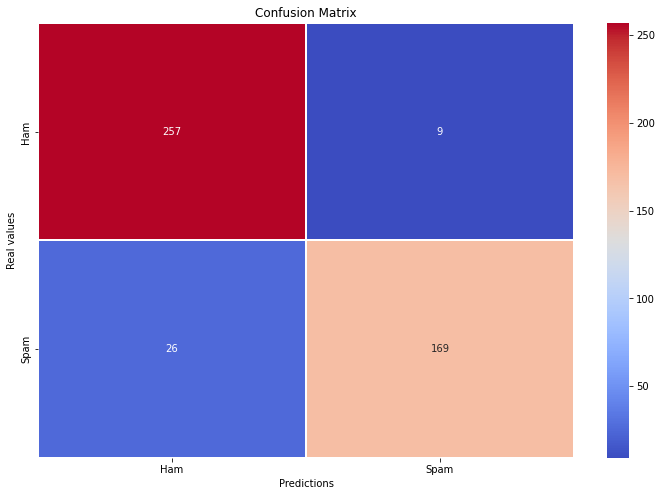

In [17]:
#Calculate the confusion matrix
dt_matrix = confusion_matrix(y_test, dt_pred)

#Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(dt_matrix,
            cmap='coolwarm',
            linecolor='white',
            linewidths=1,
            xticklabels=Labels,
            yticklabels=Labels,
            annot=True,
            fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Real values')
plt.xlabel('Predictions')
plt.show()

##K Nearest Neighbor

In [18]:
#Import the model from scikit learn
from sklearn.neighbors import KNeighborsClassifier

#Creating the model
knn_model = KNeighborsClassifier(n_neighbors=5)

#Model training
knn_model.fit(X_train,y_train)

#Model predictions
knn_pred = knn_model.predict(X_test)

In [19]:
#Print the classification report of the model
print(classification_report(y_test, knn_pred, target_names=[l for l in Labels]))

              precision    recall  f1-score   support

         Ham       0.88      0.94      0.91       266
        Spam       0.91      0.83      0.87       195

    accuracy                           0.89       461
   macro avg       0.89      0.88      0.89       461
weighted avg       0.89      0.89      0.89       461



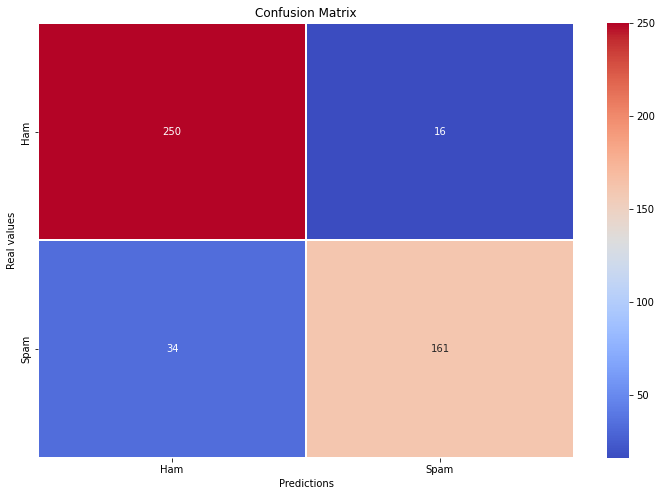

In [20]:
#Calculate the confusion matrix
knn_matrix = confusion_matrix(y_test, knn_pred)

#Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(knn_matrix,
            cmap='coolwarm',
            linecolor='white',
            linewidths=1,
            xticklabels=Labels,
            yticklabels=Labels,
            annot=True,
            fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Real values')
plt.xlabel('Predictions')
plt.show()

##Random Forest Classifier

In [21]:
#Import the model from scikit learn
from sklearn.ensemble import RandomForestClassifier

#Creating the model
rf_model = RandomForestClassifier(n_estimators=100)

#Model training
rf_model.fit(X_train,y_train)

#Model predictions
rf_pred = rf_model.predict(X_test)

In [22]:
#Print the classification report of the model
print(classification_report(y_test, rf_pred, target_names=[l for l in Labels]))

              precision    recall  f1-score   support

         Ham       0.92      0.99      0.95       266
        Spam       0.98      0.88      0.93       195

    accuracy                           0.94       461
   macro avg       0.95      0.94      0.94       461
weighted avg       0.95      0.94      0.94       461



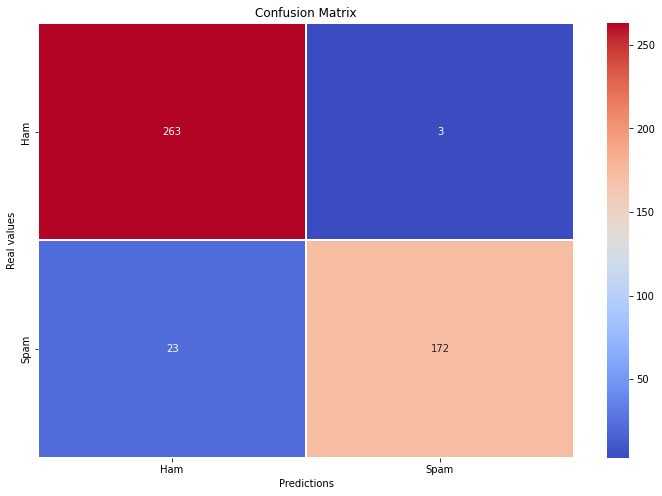

In [23]:
#Calculate the confusion matrix
rf_matrix = confusion_matrix(y_test, rf_pred)

#Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(rf_matrix,
            cmap='coolwarm',
            linecolor='white',
            linewidths=1,
            xticklabels=Labels,
            yticklabels=Labels,
            annot=True,
            fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Real values')
plt.xlabel('Predictions')
plt.show()

#GLOVE Word Embedding

In [24]:
#Get the pre-trained GLOVE word embeddings
#Uncomment below lines if using google colab

!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2022-03-12 18:24:28--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-03-12 18:24:28--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-03-12 18:24:28--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [26]:
#Uncomment below line and choose 'SMSSpamCollection.csv' if using google colab
files.upload()

#Data Loading
df = pd.read_csv('GloveSpamCollection.csv', delimiter='\t',header=None)
df.columns = ['label', 'text']
X = df['text'].values.tolist()
y = df['label'].values.tolist()

#DATA PREPROCESSING
Sent_len = 100    #Sentence length
Embed_dim = 100   #Word embedding dimensions

# conversion dictionary
label2int = {"ham": 0, "spam": 1}

# Text tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)

# Convert data to numpy array
X = np.array(X)
y = np.array(y)

# Padding sentences
X = pad_sequences(X, maxlen=Sent_len)

#Encoding categorical data
y = [ label2int[label] for label in y ]
y = to_categorical(y)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Saving GloveSpamCollection.csv to GloveSpamCollection.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [28]:
# WORD EMBEDDINGS
embed_idx = {}
with open(f"glove.6B.100d.txt", encoding='utf8') as f:
    for line in tqdm.tqdm(f, "Reading GloVe"):
        vals = line.split()
        word = vals[0]
        vectors = np.asarray(vals[1:], dtype='float32')
        embed_idx[word] = vectors

word_idx = tokenizer.word_index
embed_mat = np.zeros((len(word_idx)+1, Embed_dim))
for word, i in word_idx.items():
    embedding_vector = embed_idx.get(word)
    if embedding_vector is not None:
        embed_mat[i] = embedding_vector

Reading GloVe: 400000it [00:14, 27800.35it/s]


In [29]:
#Model Design
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dropout, Dense

glove_model = Sequential()  #Model class

#Add embedding layer
glove_model.add(Embedding(len(tokenizer.word_index)+1,
          Embed_dim,
          weights=[embed_mat],
          trainable=False,
          input_length=Sent_len))

#Add long short term memory layer
glove_model.add(LSTM(128, recurrent_dropout=0.2))

#Dropout some random weights
glove_model.add(Dropout(0.3))

#Classification layer
glove_model.add(Dense(2, activation="softmax"))

#Model compilation
glove_model.compile(optimizer="rmsprop", loss="categorical_crossentropy",
              metrics=["accuracy"])

#Model Training
Batches = 64
Epochs = 5 

glove_model.fit(X_train, y_train,
          batch_size=Batches, epochs=Epochs,
          verbose=1)

#Model prediction
glove_pred = np.argmax(glove_model.predict(X_test), axis=1)

Epoch 1/5
70/70 [==============================] - 25s 290ms/step - loss: 0.1714 - accuracy: 0.9336
Epoch 2/5
70/70 [==============================] - 20s 288ms/step - loss: 0.0834 - accuracy: 0.9740
Epoch 3/5
70/70 [==============================] - 20s 289ms/step - loss: 0.0679 - accuracy: 0.9785
Epoch 4/5
70/70 [==============================] - 20s 288ms/step - loss: 0.0606 - accuracy: 0.9816
Epoch 5/5
70/70 [==============================] - 20s 289ms/step - loss: 0.0476 - accuracy: 0.9841


In [30]:
#Print the classification report of the model
print(classification_report(np.argmax(y_test,axis=1), glove_pred, target_names=[l for l in Labels]))

              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       958
        Spam       0.95      0.92      0.94       157

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



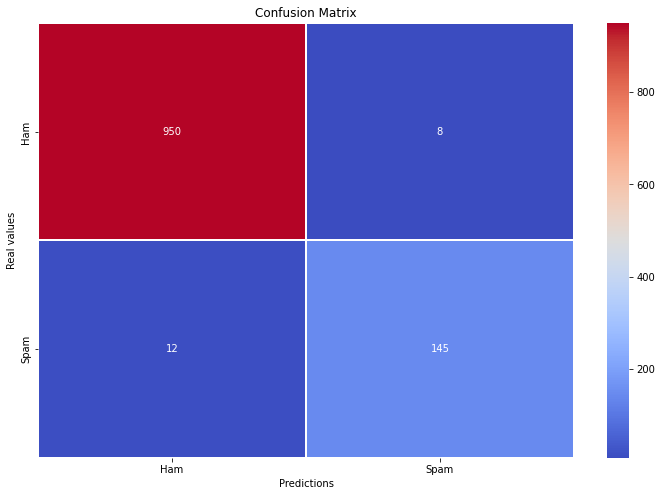

In [32]:
#Calculate the confusion matrix
glove_matrix = confusion_matrix(np.argmax(y_test,axis=1), glove_pred)

#Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(glove_matrix,
            cmap='coolwarm',
            linecolor='white',
            linewidths=1,
            xticklabels=Labels,
            yticklabels=Labels,
            annot=True,
            fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Real values')
plt.xlabel('Predictions')
plt.show()